#Zomato Data Analysis

### Importing Liberaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [5]:
dataframe = pd.read_csv("Zomato data .csv")

In [7]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Data Cleaning

In [9]:
#convert the data type of column rate
def convert_rate(value):
    if isinstance(value,str):
        value = value.replace("/5","")
        return float(value)
    return value

dataframe['rate'] = dataframe['rate'].apply(convert_rate)

In [16]:
#checking data info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [17]:
#checking null values
dataframe.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [52]:
# Questions

# 1. What type of restaurant do the majourity of customers order from ?
# 2. How many votes has each type of restaurant received from customers ?
# 3. What are the ratings that the majourity of restaurants have received?
# 4. Zomato has observed that most couples order most of their food onlin. What is their average spending on each order ?
# 5. What mode (online or offline) has received the maximum ratings ?
# 6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers ?

# Type of Restaurent

Text(0, 0.5, 'Count')

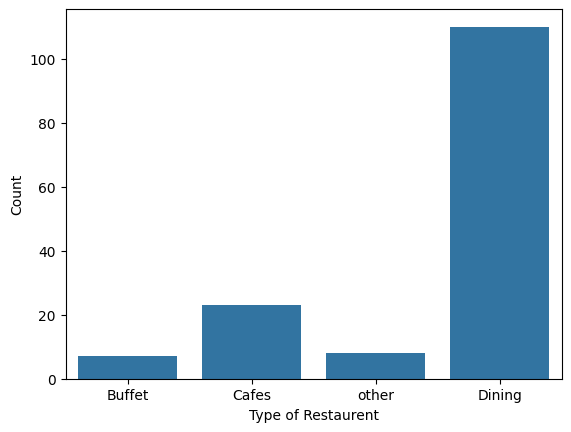

In [22]:
sns.countplot(x="listed_in(type)",data=dataframe)
plt.xlabel("Type of Restaurent")
plt.ylabel("Count")

# Majourity customers orders from dining type restaurent

# Votes for each restaurent type

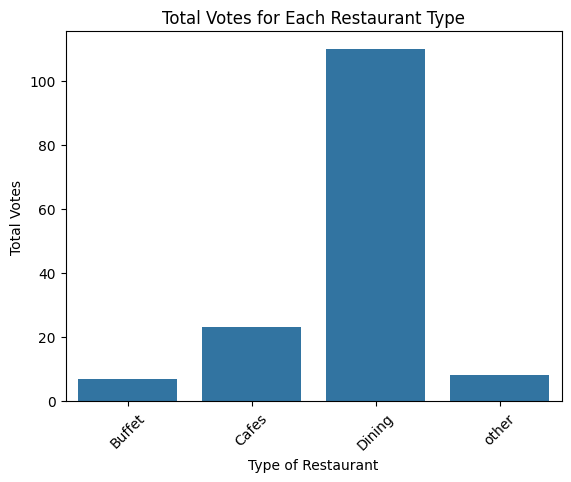

In [26]:
votes_by_type = dataframe.groupby('listed_in(type)')['votes'].sum()

sns.countplot(x='listed_in(type)', data=dataframe, order=votes_by_type.index)
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.title("Total Votes for Each Restaurant Type")
plt.xticks(rotation=45)
plt.show()

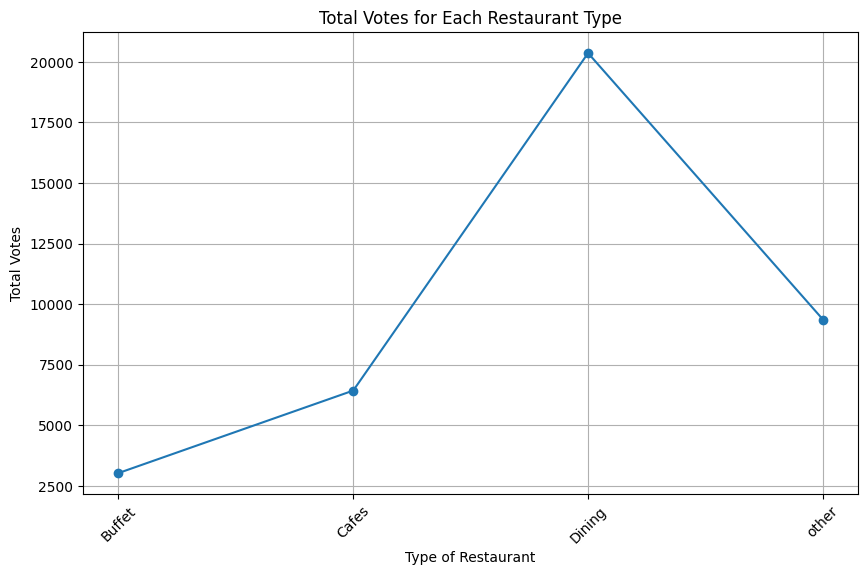

In [30]:

plt.figure(figsize=(10, 6))
plt.plot(votes_by_type.index, votes_by_type.values, marker='o')
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.title("Total Votes for Each Restaurant Type")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Dining Restaurants have recieved maximum votes

# Ratings

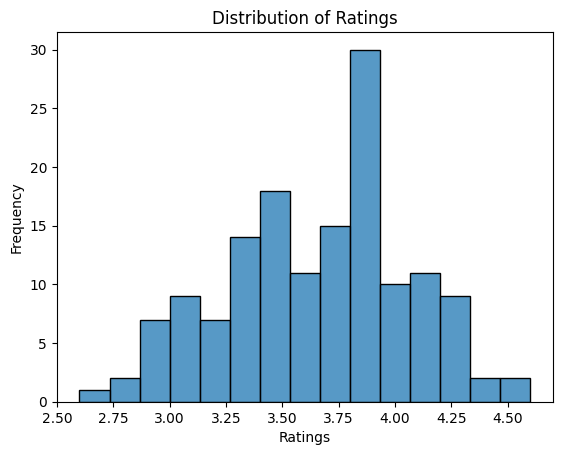

In [37]:

sns.histplot(dataframe['rate'].dropna(), bins=15)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

#majority restaurents recieved ratings 3.75 to 4.0

# Average order spendings

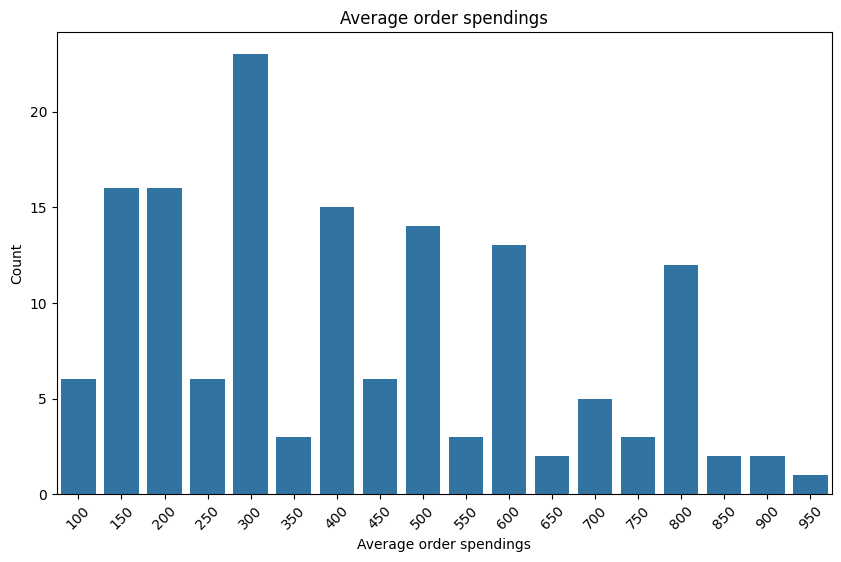

In [43]:
spendings = dataframe['approx_cost(for two people)']
plt.figure(figsize=(10, 6))
sns.countplot(x=spendings)
plt.xlabel("Average order spendings")
plt.ylabel("Count")
plt.title("Average order spendings")
plt.xticks(rotation=45)
plt.show()

# majority of customers spendings is Rs 300

#Online or Offline

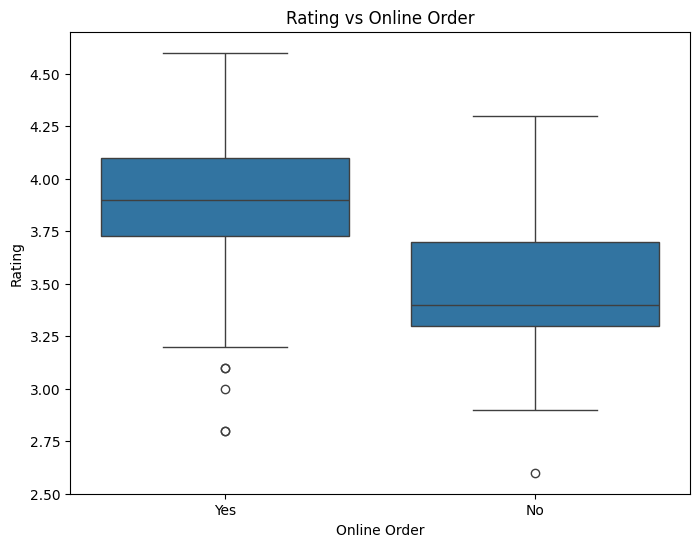

In [46]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.title("Rating vs Online Order")
plt.show()

#offline orders recieves lower rating in comparision to online rating

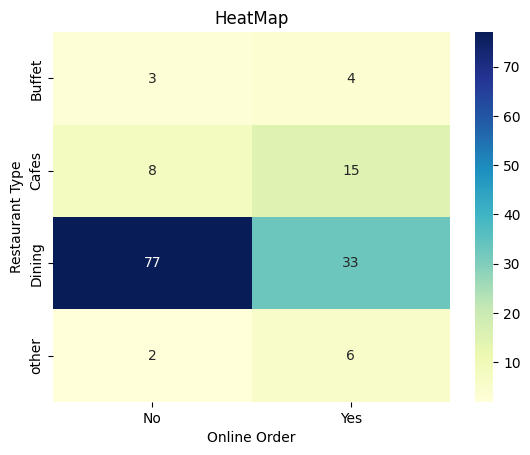

In [50]:
  pivot_table = dataframe.pivot_table(index='listed_in(type)', columns = 'online_order' , aggfunc = 'size', fill_value=0)
  sns.heatmap(pivot_table, annot=True,cmap="YlGnBu")
  plt.xlabel("Online Order")
  plt.ylabel("Restaurant Type")
  plt.title("HeatMap")
  plt.show()


In [51]:
# Dining restaurants has majourity of offline orders whereas in cafes people prefer online orders.